In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [87]:
data=pd.read_csv("diabetes_data_upload.csv")

In [88]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [90]:
data.groupby(["class"]).count()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
Negative,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Positive,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


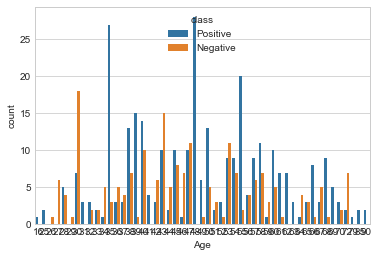

In [91]:
sns.countplot(x="Age", hue='class', data=data)

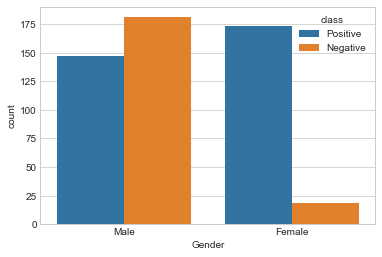

In [92]:
sns.countplot(x="Gender", hue='class', data=data)

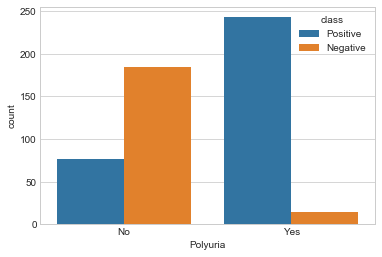

In [93]:
sns.countplot(x="Polyuria", hue='class', data=data)

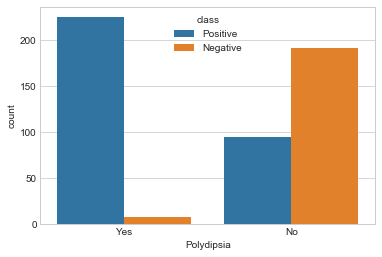

In [94]:
sns.countplot(x="Polydipsia", hue='class', data=data)

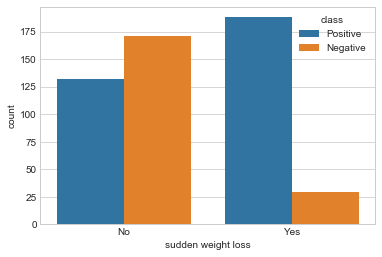

In [95]:
sns.countplot(x="sudden weight loss", hue='class', data=data)

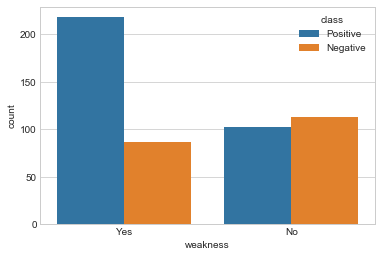

In [96]:
sns.countplot(x="weakness", hue='class', data=data)

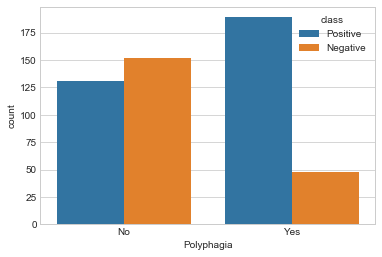

In [97]:
sns.countplot(x="Polyphagia", hue='class', data=data)

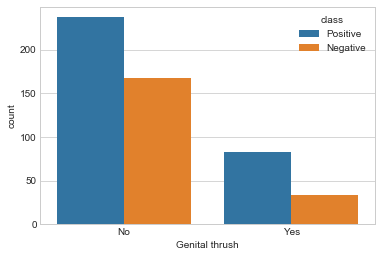

In [98]:
sns.countplot(x="Genital thrush", hue='class', data=data)

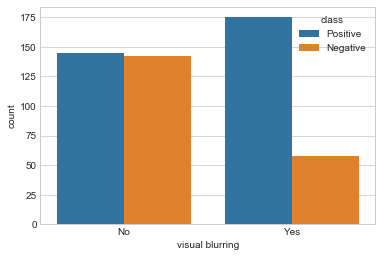

In [99]:
sns.countplot(x="visual blurring", hue='class', data=data)

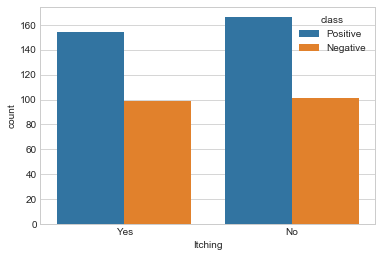

In [100]:
sns.countplot(x="Itching", hue='class', data=data)

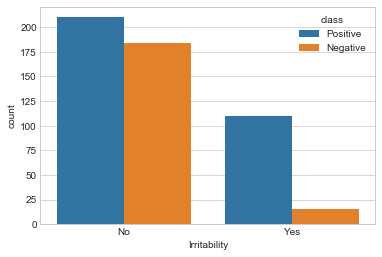

In [101]:
sns.countplot(x="Irritability", hue='class', data=data)

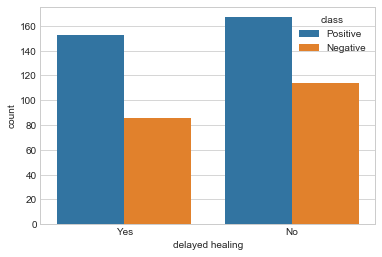

In [102]:
sns.countplot(x="delayed healing", hue='class', data=data)

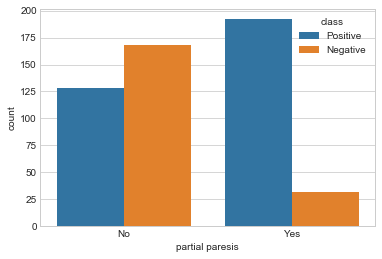

In [103]:
sns.countplot(x="partial paresis", hue='class', data=data)

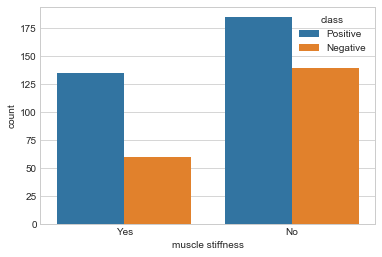

In [104]:
sns.countplot(x="muscle stiffness", hue='class', data=data)

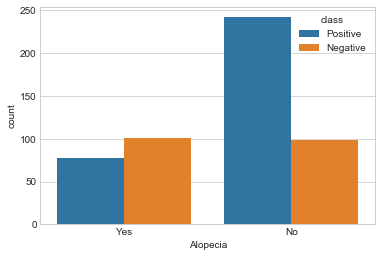

In [105]:
sns.countplot(x="Alopecia", hue='class', data=data)

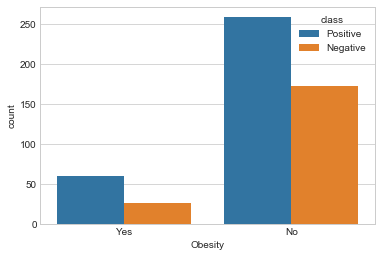

In [106]:
sns.countplot(x="Obesity", hue='class', data=data)

In [107]:
#tüm featurelar iki tane veriden oluştuğu için hepsinde label encoding kullanıldı
label = preprocessing.LabelEncoder() 
  
data["Gender"]= label.fit_transform(data["Gender"])
data["Polyuria"]= label.fit_transform(data["Polyuria"])
data["Polydipsia"]= label.fit_transform(data["Polydipsia"])
data["sudden weight loss"]= label.fit_transform(data["sudden weight loss"])

In [108]:
data["weakness"]= label.fit_transform(data["weakness"])
data["Polyphagia"]= label.fit_transform(data["Polyphagia"])
data["Genital thrush"]= label.fit_transform(data["Genital thrush"])
data["visual blurring"]= label.fit_transform(data["visual blurring"])

In [109]:
data["Itching"]= label.fit_transform(data["Itching"])
data["Irritability"]= label.fit_transform(data["Irritability"])
data["delayed healing"]= label.fit_transform(data["delayed healing"])
data["partial paresis"]= label.fit_transform(data["partial paresis"])

In [110]:
data["muscle stiffness"]= label.fit_transform(data["muscle stiffness"])
data["Alopecia"]= label.fit_transform(data["Alopecia"])
data["Obesity"]= label.fit_transform(data["Obesity"])
data["class"]= label.fit_transform(data["class"])

In [111]:
y=data["class"]

In [112]:
x=data.drop(["class"],axis=1)

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (416, 16)
x test:  (104, 16)
y train:  (416,)
y test:  (104,)


In [114]:
#age featurenin aralığı diğerlerine uymadığı için min-max scaler yapılmıştır
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [115]:
def model(model):
    model.fit(x_train,y_train) #modelin fit edilmesi
    pred=model.predict(x_test) #tahminlerin alınması
    print("train score",model.score(x_train,y_train) ) #eğitim skoru
    print("test score" , model.score(x_test,y_test)) #test skoru
    print(classification_report(y_test,pred)) #sınıflandırma raporunun elde edilmesi test ve tahmin sonuçlarına göre

In [116]:
svc=LinearSVC(C=0.1)#c değeri değiştirilmiştir
model(svc)

train score 0.9254807692307693
test score 0.9519230769230769
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        40
          1       0.95      0.97      0.96        64

avg / total       0.95      0.95      0.95       104



In [117]:
svc=LinearSVC(C=1)#değeri yükseltmek underfitting değerini değiştirmemiştir
model(svc)

train score 0.9326923076923077
test score 0.9519230769230769
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        40
          1       0.95      0.97      0.96        64

avg / total       0.95      0.95      0.95       104



In [118]:
svc=LinearSVC(C=0.01)#değeri azaltmak underfitting durumunu düzeltmemiştir
model(svc)

train score 0.9086538461538461
test score 0.9326923076923077
             precision    recall  f1-score   support

          0       0.90      0.93      0.91        40
          1       0.95      0.94      0.94        64

avg / total       0.93      0.93      0.93       104



In [119]:
log=LogisticRegression(C=0.1)#logistic reg için de c parametresi önemlidir
model(log)

train score 0.9014423076923077
test score 0.9134615384615384
             precision    recall  f1-score   support

          0       0.90      0.88      0.89        40
          1       0.92      0.94      0.93        64

avg / total       0.91      0.91      0.91       104



In [120]:
log=LogisticRegression(C=1) #artırmak underfitting durumunu düzeltmemiştir
model(log)

train score 0.9230769230769231
test score 0.9519230769230769
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        40
          1       0.95      0.97      0.96        64

avg / total       0.95      0.95      0.95       104



In [121]:
log=LogisticRegression(C=0.01)#azaltmak underfitting durumunu değiştirmemiştir
model(log)

train score 0.8485576923076923
test score 0.8557692307692307
             precision    recall  f1-score   support

          0       0.96      0.65      0.78        40
          1       0.82      0.98      0.89        64

avg / total       0.87      0.86      0.85       104



In [122]:
#sorun class 1in daha fazla olacağı düşünüşülmüştür
#bu yüzden class 1deki veri sayısı artırıldı
data_majority = data[data["class"]==1]
data_minority = data[data["class"]==0]
 

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     #değiştirme yöntemi ile veri artırımı
                                 n_samples=250,    #daha çok olan sınıfa göre veri ayarlanıyor
                                 #eşit değerde veri olursa çok fazla benzer veri olacağı için veri sayısı daha az tutuldu
                                 random_state=15) 
 

data = pd.concat([data_majority, data_minority_upsampled])
data["class"].value_counts()

1    320
0    250
Name: class, dtype: int64

In [123]:
y=data["class"]
x=data.drop(["class"],axis=1)

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (456, 16)
x test:  (114, 16)
y train:  (456,)
y test:  (114,)


In [125]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [126]:
svc=LinearSVC(C=0.1)
model(svc)

train score 0.9320175438596491
test score 0.8245614035087719
             precision    recall  f1-score   support

          0       0.78      0.87      0.82        53
          1       0.87      0.79      0.83        61

avg / total       0.83      0.82      0.82       114



In [127]:
svc=LinearSVC(C=1)#c değerini artırmak genellemeyi artırmıştır
model(svc)

train score 0.9276315789473685
test score 0.8508771929824561
             precision    recall  f1-score   support

          0       0.83      0.85      0.84        53
          1       0.87      0.85      0.86        61

avg / total       0.85      0.85      0.85       114



In [128]:
svc=LinearSVC(C=10)#genelleme ve class dengesi olarak en iyi sonucu vermiştir
model(svc)

train score 0.9254385964912281
test score 0.8508771929824561
             precision    recall  f1-score   support

          0       0.83      0.85      0.84        53
          1       0.87      0.85      0.86        61

avg / total       0.85      0.85      0.85       114



In [129]:
log=LogisticRegression(C=0.1)
model(log)

train score 0.9210526315789473
test score 0.8421052631578947
             precision    recall  f1-score   support

          0       0.84      0.81      0.83        53
          1       0.84      0.87      0.85        61

avg / total       0.84      0.84      0.84       114



In [130]:
log=LogisticRegression(C=1)#değer artınca başarılar artmıştır
model(log)

train score 0.9210526315789473
test score 0.7982456140350878
             precision    recall  f1-score   support

          0       0.77      0.81      0.79        53
          1       0.83      0.79      0.81        61

avg / total       0.80      0.80      0.80       114



In [131]:
log=LogisticRegression(C=10)#classlar daha iyi dengelenmiş model başarısı daha genel hale gelmiştir
model(log)

train score 0.9078947368421053
test score 0.7982456140350878
             precision    recall  f1-score   support

          0       0.78      0.79      0.79        53
          1       0.82      0.80      0.81        61

avg / total       0.80      0.80      0.80       114

